## Задание 1.3

С помощью метода максимального правдоподобия найдем оценку параметра $\theta$.
Заменим на логарифмическую функцию правдоподобия

$L(X | \theta) = \sum_{i=1}^n ln (C_m^{x_i} * \theta^{x_i} * (1 - \theta)^{(m - x_i)})$ \

$L(X | \theta) = \sum_{i=1}^n (ln C_m^{x_i} + x_i ln \theta + (m - x_i) ln (1-\theta))$ 

$L' = \sum_{i=1}^n (\frac{x_i}{\theta} - \frac {m - x_i}{1 - \theta}) = \sum_{i=1}^n \frac{x_i - x_i \theta - \theta m + \theta x_i}{\theta (1 - \theta)} = \sum_{i=1}^n \frac{x_i - \theta m}{\theta (1 - \theta)} = 0$

$\frac {\sum_{i=1}^n x_i - n m \theta}{\theta (1 - \theta)} = 0$

$\theta = \frac {\sum_{i=1}^n x_i} {n m} = \frac {\overline{X}} {m}$

## Асимптотическая нормальность оценки

По Ц.П.Т. имеем:


$\sqrt{n} \left( \frac{\frac {\overline{X}_n} m - \theta}{{{\theta} (1-\theta)}} \right) \xrightarrow{d} N(0,1)$

## Свойства оценки
* Несмещенность - следует из асимптотической нормальности.
* Состоятельность - следует из асиптотической нормальности.
* Асимптотическая нормальность - доказана выше

n = 10: смещение = 0.000047, дисперсия = 0.003987, СКО = 0.063147, MSE = 0.003987, |ошибка| > 0.05: 44672 раз
n = 50: смещение = -0.000027, дисперсия = 0.000800, СКО = 0.028290, MSE = 0.000800, |ошибка| > 0.05: 7658 раз
n = 100: смещение = -0.000067, дисперсия = 0.000402, СКО = 0.020055, MSE = 0.000402, |ошибка| > 0.05: 1263 раз
n = 500: смещение = 0.000037, дисперсия = 0.000080, СКО = 0.008935, MSE = 0.000080, |ошибка| > 0.05: 0 раз
n = 1000: смещение = 0.000028, дисперсия = 0.000040, СКО = 0.006340, MSE = 0.000040, |ошибка| > 0.05: 0 раз


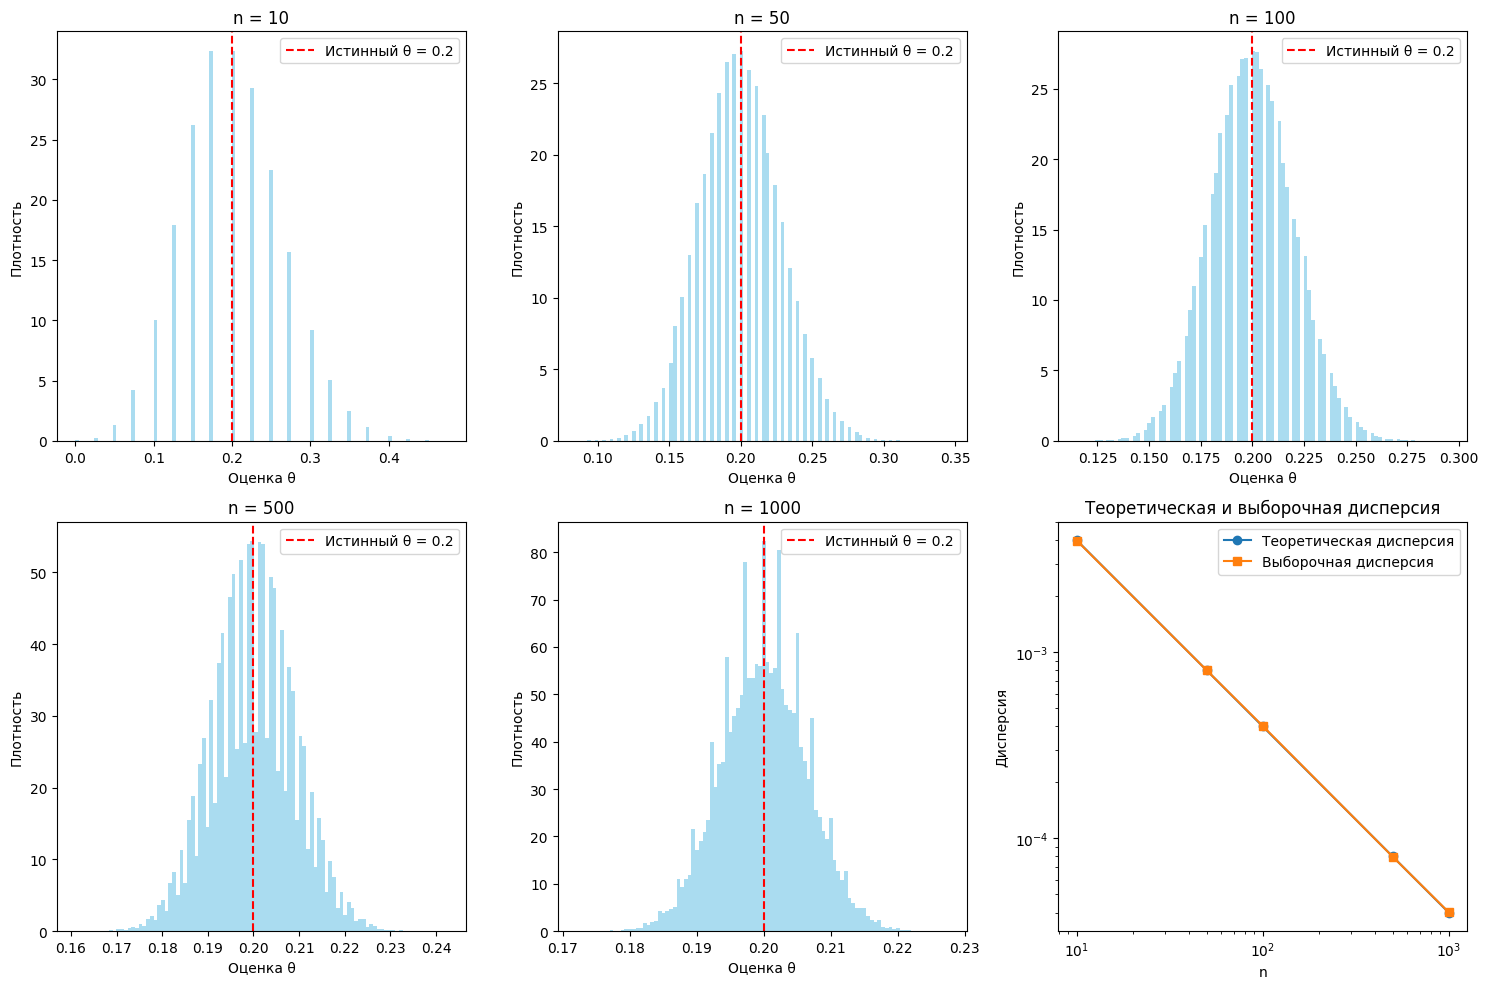

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 4
theta = 0.2
sizes = [10, 50, 100, 500, 1000]
M = 100000
threshold = 0.05

results = {}

for n in sizes:
    estimates = []
    for _ in range(M):
        sample = np.random.binomial(m, theta, size=n)
        theta_hat = np.sum(sample) / (m * n)
        estimates.append(theta_hat)

    estimates = np.array(estimates)
    error = estimates - theta

    bias = np.mean(error)
    variance = np.var(estimates)
    mse = np.mean(error**2)
    count_above_threshold = np.sum(np.abs(error) > threshold)

    results[n] = {
        'bias': bias,
        'variance': variance,
        'mse': mse,
        'count_above_threshold': count_above_threshold,
        'estimates': estimates
    }

    print(f"n = {n}: смещение = {bias:.6f}, дисперсия = {variance:.6f}, "
          f"СКО = {np.sqrt(variance):.6f}, MSE = {mse:.6f}, "
          f"|ошибка| > {threshold}: {count_above_threshold} раз")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, n in enumerate(sizes):
    ax = axes[idx]
    ax.hist(results[n]['estimates'], bins=100, density=True, alpha=0.7, color='skyblue')
    ax.axvline(theta, color='red', linestyle='--', label=f'Истинный θ = {theta}')
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Оценка θ')
    ax.set_ylabel('Плотность')
    ax.legend()

axes[5].plot(sizes, [theta*(1-theta)/(n*m) for n in sizes], 'o-', label='Теоретическая дисперсия')
axes[5].plot(sizes, [results[n]['variance'] for n in sizes], 's-', label='Выборочная дисперсия')
axes[5].set_xscale('log')
axes[5].set_yscale('log')
axes[5].set_xlabel('n')
axes[5].set_ylabel('Дисперсия')
axes[5].legend()
axes[5].set_title('Теоретическая и выборочная дисперсия')

plt.tight_layout()
plt.show()

## Задание 2.3

Данные: $X_1, \dots, X_n \sim \text{Exp}(\theta)$  
Плотность: $f(x|\theta) = \theta e^{-\theta x}, \quad x > 0, \theta > 0$

**Априорное распределение:** $\theta \sim \text{Gamma}(\lambda, k)$  
$\pi(\theta) = \frac{\lambda^{k}}{k!} \theta^{k-1} e^{-\lambda \theta}, \quad \theta > 0$

**Правдоподобие:**
$$L(\mathbf{X}|\theta) = \prod_{i=1}^n \theta e^{-\theta X_i} = \theta^n e^{-\theta \sum_{i=1}^n X_i}$$

**Нормировочная константа:**
$$\int_0^\infty \theta^{k+n-1} e^{-\theta(\lambda + \sum X_i)} d\theta = \frac{(k+n-1)!}{(\lambda + \sum X_i)^{k+n}}$$

**Апостериорная плотность:**
$$\pi(\theta|\mathbf{X}) = \frac{(\lambda + \sum X_i)^{k+n}}{(k+n-1)!} \theta^{k+n-1} e^{-\theta(\lambda + \sum_{i=1}^n X_i)}$$

**Параметры апостериорного распределения:**
$$k' = k + n, \quad \lambda' = \lambda + \sum_{i=1}^n X_i$$
$$\theta|\mathbf{X} \sim \text{Gamma}(k', \lambda')$$

**Математическое ожидание:**
$$\mathbb{E}[\theta|\mathbf{X}] = \frac{k'}{\lambda'} = \frac{k + n}{\lambda + \sum_{i=1}^n X_i}$$

n = 10: смещение = 0.038382, дисперсия = 0.006692, СКО = 0.081803, MSE = 0.008165, |ошибка| > 0.05: 44826 раз
n = 50: смещение = 0.007375, дисперсия = 0.000887, СКО = 0.029788, MSE = 0.000942, |ошибка| > 0.05: 9490 раз
n = 100: смещение = 0.003516, дисперсия = 0.000424, СКО = 0.020591, MSE = 0.000436, |ошибка| > 0.05: 2103 раз
n = 500: смещение = 0.000728, дисперсия = 0.000080, СКО = 0.008953, MSE = 0.000081, |ошибка| > 0.05: 0 раз
n = 1000: смещение = 0.000390, дисперсия = 0.000040, СКО = 0.006325, MSE = 0.000040, |ошибка| > 0.05: 0 раз


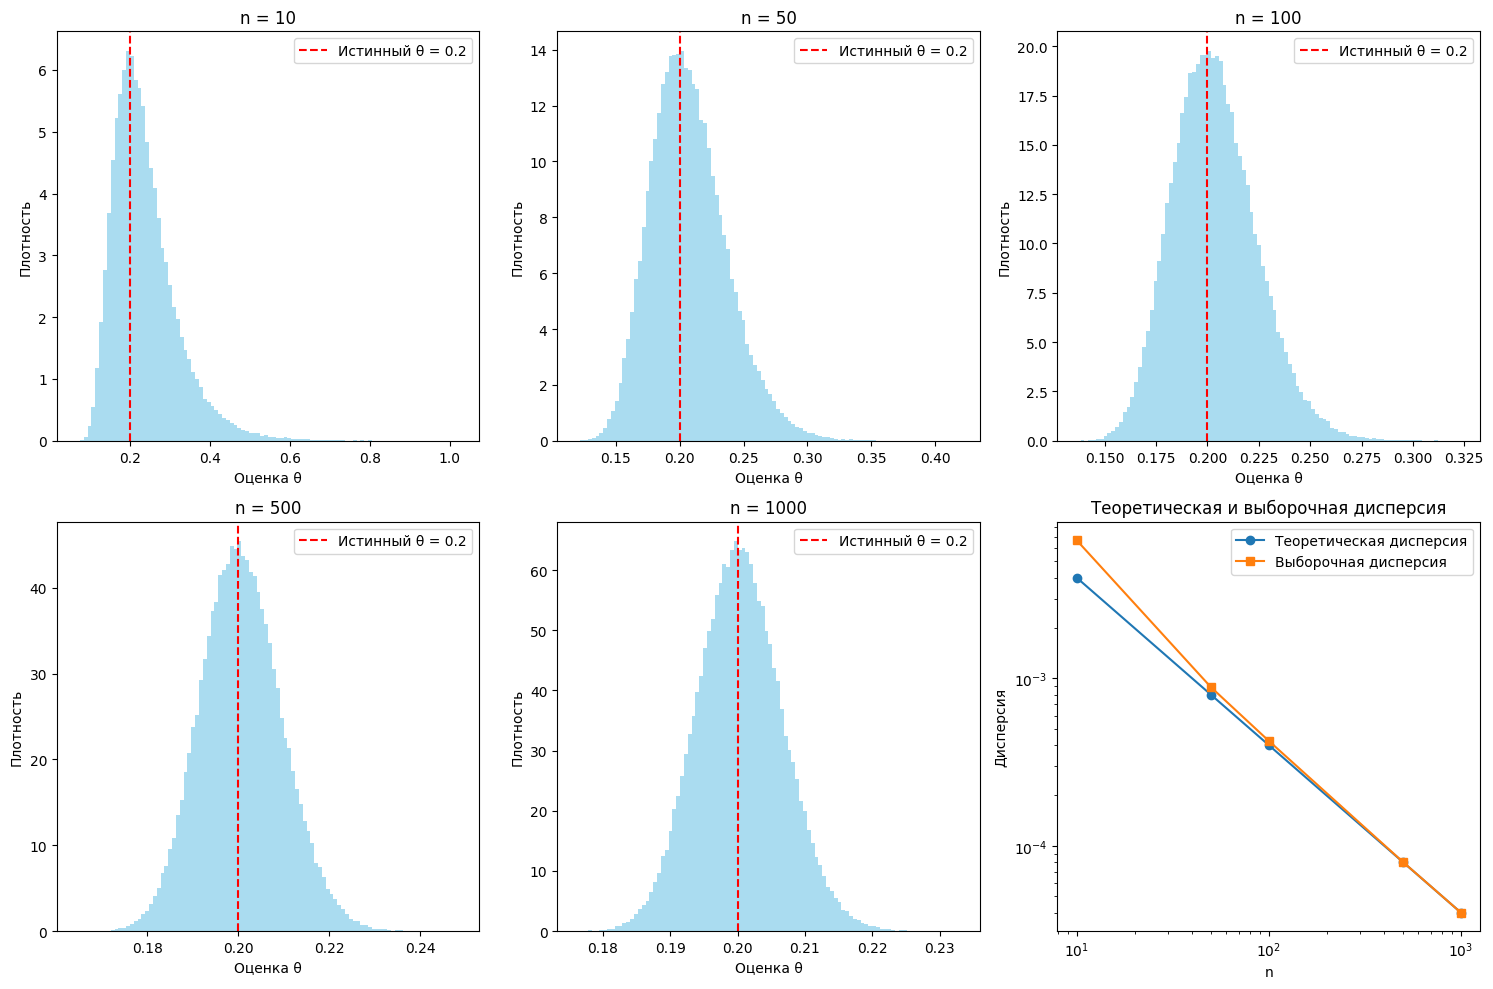

In [3]:
import numpy as np
import matplotlib.pyplot as plt

k = 1
lambda_ = 1 
theta = 0.2
sizes = [10, 50, 100, 500, 1000]
M = 100000
threshold = 0.05

results = {}

for n in sizes:
    estimates = []
    for _ in range(M):
        sample = np.random.exponential(scale=1/theta, size=n)
        theta_hat = (k + n) / (lambda_ + np.sum(sample))
        estimates.append(theta_hat)

    estimates = np.array(estimates)
    error = estimates - theta

    bias = np.mean(error)
    variance = np.var(estimates)
    mse = np.mean(error**2)
    count_above_threshold = np.sum(np.abs(error) > threshold)

    results[n] = {
        'bias': bias,
        'variance': variance,
        'mse': mse,
        'count_above_threshold': count_above_threshold,
        'estimates': estimates
    }

    print(f"n = {n}: смещение = {bias:.6f}, дисперсия = {variance:.6f}, "
          f"СКО = {np.sqrt(variance):.6f}, MSE = {mse:.6f}, "
          f"|ошибка| > {threshold}: {count_above_threshold} раз")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, n in enumerate(sizes):
    ax = axes[idx]
    ax.hist(results[n]['estimates'], bins=100, density=True, alpha=0.7, color='skyblue')
    ax.axvline(theta, color='red', linestyle='--', label=f'Истинный θ = {theta}')
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Оценка θ')
    ax.set_ylabel('Плотность')
    ax.legend()

axes[5].plot(sizes, [theta*(1-theta)/(n*m) for n in sizes], 'o-', label='Теоретическая дисперсия')
axes[5].plot(sizes, [results[n]['variance'] for n in sizes], 's-', label='Выборочная дисперсия')
axes[5].set_xscale('log')
axes[5].set_yscale('log')
axes[5].set_xlabel('n')
axes[5].set_ylabel('Дисперсия')
axes[5].legend()
axes[5].set_title('Теоретическая и выборочная дисперсия')

plt.tight_layout()
plt.show()